In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')
import mne

Naison coordinates:  -4.5 0.73333


Text(0, 0.5, 'Y Coordinate')

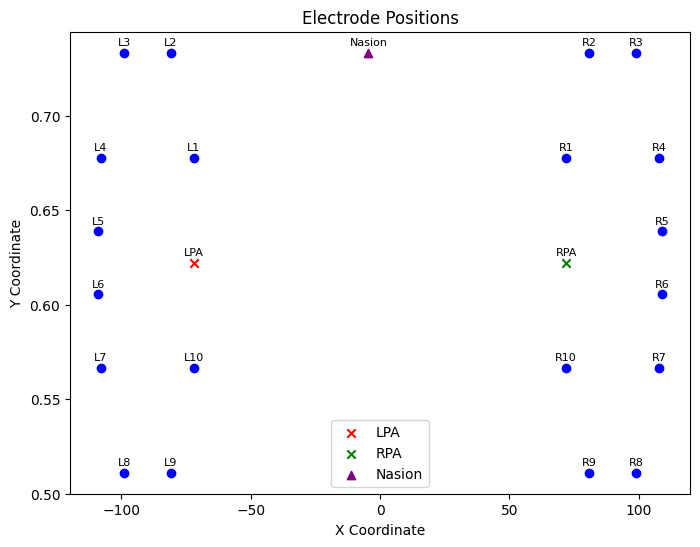

In [2]:
labels = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10',
          'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10']
x_coords = [-72, -81, -99, -108, -109, -109, -108, -99, -81, -72,
            72, 81, 99, 108, 109, 109, 108, 99, 81, 72]
y_coords = [0.67778, 0.73333, 0.73333, 0.67778, 0.63889, 0.60556, 0.56667, 0.51111, 0.51111, 0.56667,
            0.67778, 0.73333, 0.73333, 0.67778, 0.63889, 0.60556, 0.56667, 0.51111, 0.51111, 0.56667]
lpa_x = (x_coords[0] + x_coords[9])/2
lpa_y = (y_coords[0] + y_coords[9])/2

rpa_x = (x_coords[10] + x_coords[19])/2
rpa_y = (y_coords[10] + y_coords[19])/2

naison_x = (x_coords[2] + x_coords[11]+9)/2
naison_y = (y_coords[2] + y_coords[11])/2
print("Naison coordinates: ", naison_x, naison_y)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_coords, y_coords, c='blue', marker='o')
plt.scatter(lpa_x, lpa_y, c='red', marker='x', label='LPA')
plt.scatter(rpa_x, rpa_y, c='green', marker='x', label='RPA')
plt.scatter(naison_x, naison_y, c='purple', marker='^', label='Nasion')
plt.annotate('LPA', xy=(lpa_x, lpa_y), xytext=(0, 5),
             textcoords="offset points",
             fontsize=8, ha='center')
plt.annotate('RPA', xy=(rpa_x, rpa_y), xytext=(0, 5),
                textcoords="offset points",
                fontsize=8, ha='center')
plt.annotate('Nasion', xy=(naison_x, naison_y), xytext=(0, 5),
                textcoords="offset points",
                fontsize=8, ha='center')

# Adding labels to each point
for i, label in enumerate(labels):
    plt.annotate(label,  # The text to display
                 (x_coords[i], y_coords[i]),  # The position to place the text
                 textcoords="offset points",  # How to position the text
                 xytext=(0, 5),  # Offset text by 5 points above
                 ha='center',  # Horizontal alignment
                 fontsize=8)  # Font size

# Adding a legend, title and axes labels
plt.legend()
plt.title('Electrode Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

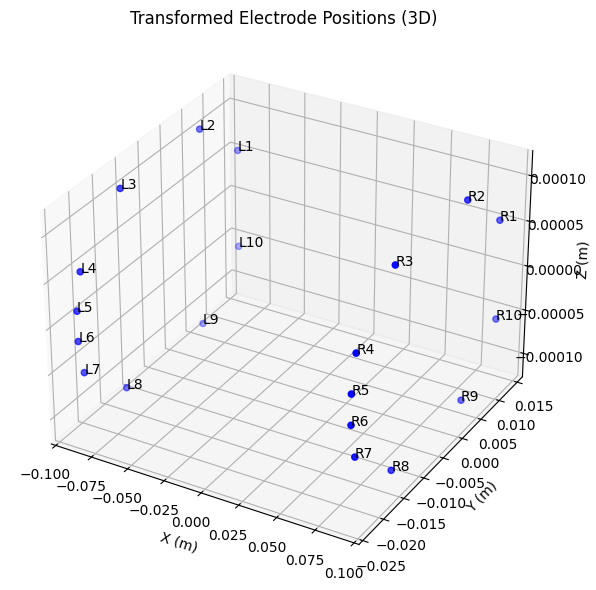

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Labels
labels = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10',
          'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10']

# 2D electrode positions
x_coords = np.array([-72, -81, -99, -108, -109, -109, -108, -99, -81, -72,
                     72, 81, 99, 108, 109, 109, 108, 99, 81, 72])
y_coords = np.array([0.67778, 0.73333, 0.73333, 0.67778, 0.63889, 0.60556, 0.56667, 0.51111, 0.51111, 0.56667,
                     0.67778, 0.73333, 0.73333, 0.67778, 0.63889, 0.60556, 0.56667, 0.51111, 0.51111, 0.56667])
elec_2d = np.column_stack([x_coords, y_coords])

left_elec_2d, right_elec_2d = elec_2d[:10], elec_2d[10:]

scale_y = 0.001
scale_z = 0.001
mat_left = np.array([[0, 0],
                     [scale_y, 0],
                     [0, scale_z]])
mat_right = np.array([[0, 0],
                      [-scale_y, 0],
                      [0, scale_z]])

off_x = .09
off_y = -0.008
off_z = 0
off_left, off_right = np.array(
    [-off_x, off_y, off_z]), np.array([off_x, off_y, off_z])
left_elec_3d_scaled, right_elec_3d_scaled = mat_left @ left_elec_2d.T, mat_right @ right_elec_2d.T
left_elec_3d_scaled, right_elec_3d_scaled = left_elec_3d_scaled.T, right_elec_3d_scaled.T
left_elec_3d_scaled, right_elec_3d_scaled = left_elec_3d_scaled - \
    np.mean(left_elec_3d_scaled, axis=0) + off_left, right_elec_3d_scaled - \
    np.mean(right_elec_3d_scaled, axis=0) + off_right
elec_3d = np.concat((left_elec_3d_scaled, right_elec_3d_scaled))


coords_mm = elec_3d  
df = pd.DataFrame(coords_mm, columns=['x', 'y', 'z'])
df.insert(0, 'ch_name', labels)
df.to_csv('ceegrid_coords.csv', index=False)

# Plot the 3D electrode positions
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(elec_3d[:, 0], elec_3d[:, 1], elec_3d[:, 2], c='b')

for i, label in enumerate(labels):
    ax.text(elec_3d[i, 0], elec_3d[i, 1], elec_3d[i, 2], label)

ax.set_title("Transformed Electrode Positions (3D)")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
plt.tight_layout()
plt.show()

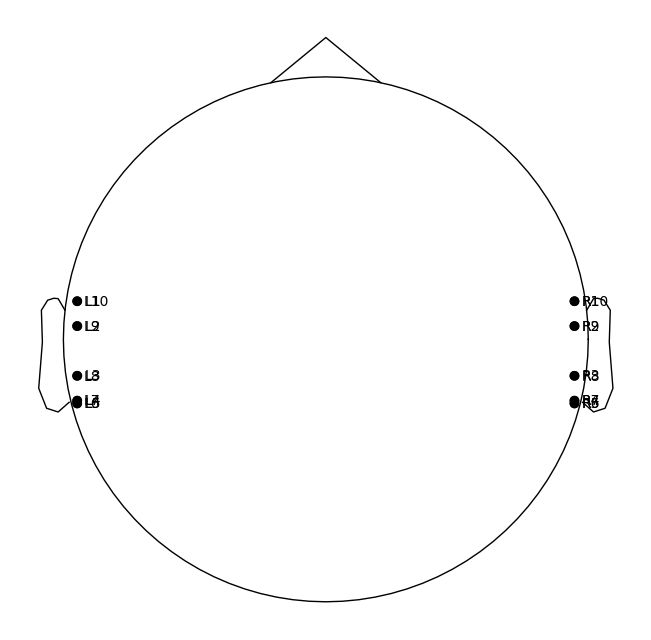

In [4]:

# Create montage from transformed 3D electrode positions
ch_pos = dict(zip(labels, elec_3d))
montage = mne.channels.make_dig_montage(ch_pos=ch_pos, coord_frame='head')

# Create a fake info object
info = mne.create_info(ch_names=labels, sfreq=1000., ch_types='eeg')
info.set_montage(montage)

# Plot in 2D
fig_2d = info.plot_sensors(kind='topomap', show_names=True)

# Plot in 3D
# fig_3d = mne.viz.plot_alignment(info, dig=True, show_axes=True)

# (fig_2d, fig_3d)


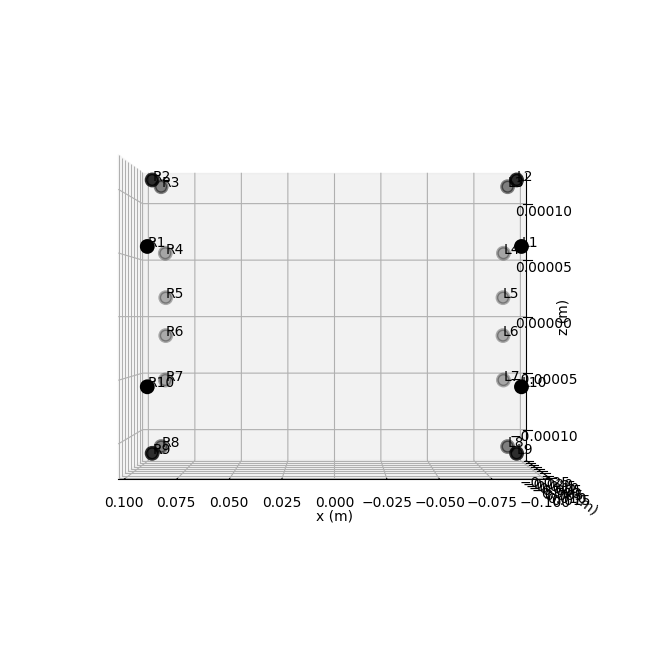

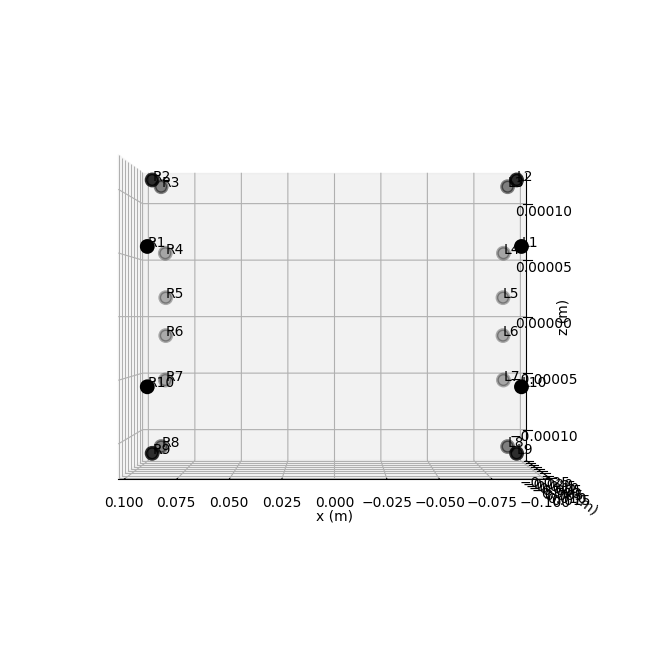

In [5]:
montage = mne.channels.read_custom_montage('ceegrid_coords.csv', coord_frame='head')
montage.plot(kind='3d', show_names=True, show=True)

In [6]:
montage.dig

[<DigPoint |     EEG #1 : (-90.0, 13.8, 0.1) mm     : head frame>,
 <DigPoint |     EEG #2 : (-90.0, 4.8, 0.1) mm      : head frame>,
 <DigPoint |     EEG #3 : (-90.0, -13.2, 0.1) mm    : head frame>,
 <DigPoint |     EEG #4 : (-90.0, -22.2, 0.1) mm    : head frame>,
 <DigPoint |     EEG #5 : (-90.0, -23.2, 0.0) mm    : head frame>,
 <DigPoint |     EEG #6 : (-90.0, -23.2, -0.0) mm   : head frame>,
 <DigPoint |     EEG #7 : (-90.0, -22.2, -0.1) mm   : head frame>,
 <DigPoint |     EEG #8 : (-90.0, -13.2, -0.1) mm   : head frame>,
 <DigPoint |     EEG #9 : (-90.0, 4.8, -0.1) mm     : head frame>,
 <DigPoint |    EEG #10 : (-90.0, 13.8, -0.1) mm    : head frame>,
 <DigPoint |    EEG #11 : (90.0, 13.8, 0.1) mm      : head frame>,
 <DigPoint |    EEG #12 : (90.0, 4.8, 0.1) mm       : head frame>,
 <DigPoint |    EEG #13 : (90.0, -13.2, 0.1) mm     : head frame>,
 <DigPoint |    EEG #14 : (90.0, -22.2, 0.1) mm     : head frame>,
 <DigPoint |    EEG #15 : (90.0, -23.2, 0.0) mm     : head fra

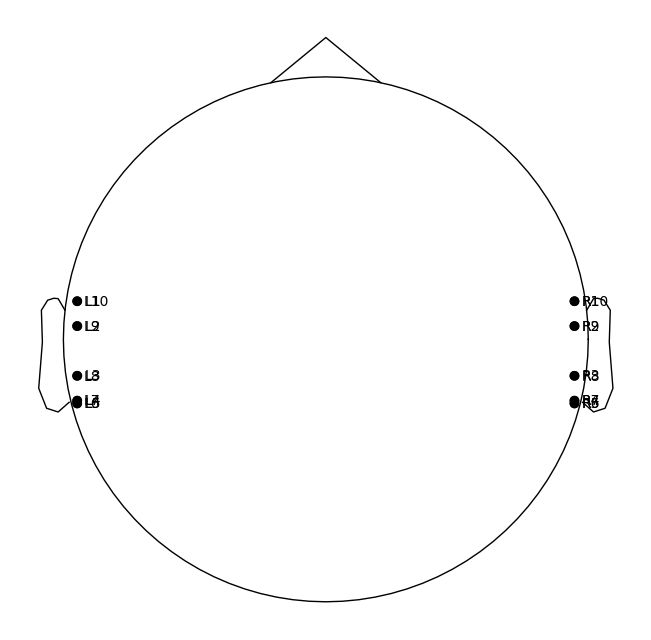

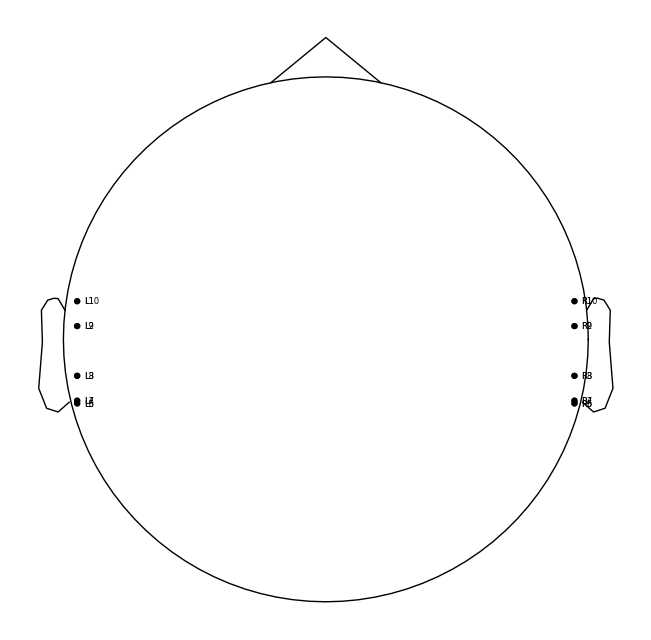

In [7]:
mne.viz.plot_montage(montage, show_names=True, scale=0.6)


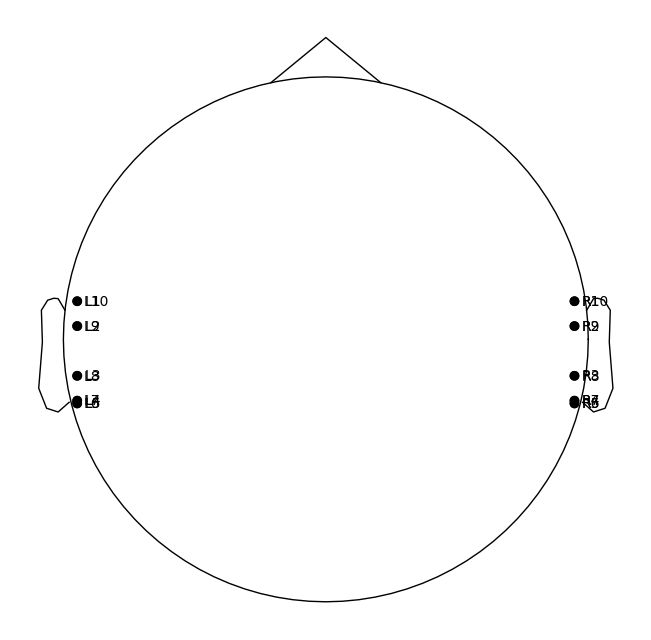

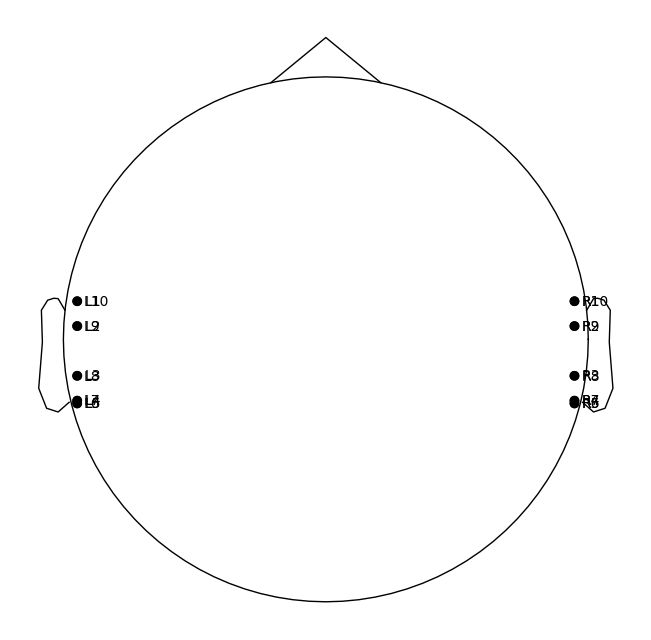

In [8]:
montage.plot(kind='topomap', show_names=True, show=True)